## Baseline Model: Logistic Resgression

Since the features in the dataset are mostly numeric and after a small amount of preprosessing the data is clean and well structured, a Logistic Regression as our baseline is the most compelling model, as it is easily interpretable, and tends to preform well with numeric tablular data

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv("cs-training.csv")

# Clean data
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Separate features and target
x = data.drop(columns=["SeriousDlqin2yrs"])
y = data["SeriousDlqin2yrs"]

# Impute missing values
imputer = SimpleImputer(strategy='median')
x_imputed = imputer.fit_transform(x)

# Scale the input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputed)

# Intialize/fit the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_scaled, y)

# Step 4: Print learned parameters
print("Classes:", logreg.classes_)
print("Intercept:", logreg.intercept_)
print("Coefficients:", logreg.coef_)

Classes: [0 1]
Intercept: [-2.85870261]
Coefficients: [[-0.00927033 -0.42024756  2.09670562 -0.05433176 -0.46544451 -0.03920628
   1.92563693  0.07687589 -3.86375553  0.10608246]]


## Evaluation Metrics

The most appropriate evaluation metrics for the classification task are: AUC, F1-score and Recall.
Recall and F1-score are appropriate preformance metrics for our model because they provide a more realistic view than accuracy alone, since our data has a heavy imbalance towards False or 0 values. AUC is also an appropriate metric because it is able to measure how well the model is distinguishing between the two classes across all thresholds, and it stays reliable with imbalanced data.

## Train-Valiation Splits

original dataset: 150000 
train_data 120000 
validation_data 30000
Validation Performance Metrics:
Recall   : 0.670
F1-score : 0.286
ROC AUC  : 0.802


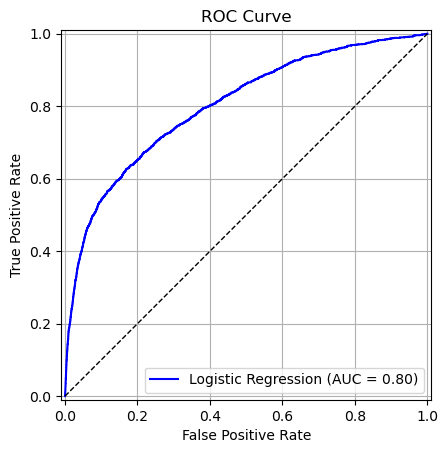

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Split data (80% train, 20% validation) w/ Stratification
x_train, x_val, y_train, y_val = train_test_split(x_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Display data split
print(
    'original dataset:', len(data),
    '\ntrain_data', len(x_train),
    '\nvalidation_data', len(x_val)
)

# Scaling
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(x_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(x_val_scaled)
y_prob = logreg.predict_proba(x_val_scaled)[:, 1]

# Evaluation metrics
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)

# Display evaluation metrics
print("Validation Performance Metrics:")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC AUC  : {auc:.3f}")

# Plot ROC curve using RocCurveDisplay
RocCurveDisplay.from_predictions(y_val, y_prob, name='Logistic Regression', color='blue')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=1)  
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


## Baseline Interpretations

- AUC = 0.80 means that the logistic regression baseline is moderately successful at seperating the two classes
- Recall = 0.670 means the model is good at identifying most of the True or 1 values, However,
- F1-score = 0.286 also suggests the model produces many false positives as the model struggles to balance precision and recall

From this information and the understanding that logisitic regression is a simple, linear model, it can be observed that our baseline has high bias and low variance. The high bias and low variance in our baseline indicates the model is underfitting the data. However, since its AUC value is not extremely low, The model is believed to be only slightly underfitting as it is still able to generalize well to unseen data.    

